##PHASE 1. EDA & DATA VALIDATION


###Load Data

In [ ]:
import kagglehub
datasource = kagglehub.dataset_download('redwankarimsony/heart-disease-data')

print('Set up Kaggle source: Successfully')

Set up Kaggle source: Successfully


In [ ]:
#Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cmdf = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

#Check general info
cmdf.info()
cmdf.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
662,663,57,Male,Switzerland,asymptomatic,140.0,0.0,False,normal,120.0,True,2.0,flat,NaN,fixed defect,2
146,147,57,Male,Cleveland,asymptomatic,165.0,289.0,True,lv hypertrophy,124.0,False,1.0,flat,3.0,reversable defect,4
52,53,44,Male,Cleveland,asymptomatic,112.0,290.0,False,lv hypertrophy,153.0,False,0.0,upsloping,1.0,normal,2
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3
633,634,52,Male,Switzerland,asymptomatic,130.0,0.0,NaN,normal,120.0,False,0.0,flat,NaN,reversable defect,2
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
148,149,45,Male,Cleveland,atypical angina,128.0,308.0,False,lv hypertrophy,170.0,False,0.0,upsloping,0.0,normal,0
289,290,56,Male,Cleveland,atypical angina,120.0,240.0,False,normal,169.0,False,0.0,downsloping,0.0,normal,0
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
203,204,64,Female,Cleveland,non-anginal,140.0,313.0,False,normal,133.0,False,0.2,upsloping,0.0,reversable defect,0


###Original Numeric Features

In [ ]:
# Describe mumeric data
print("Numeric Data Pre-transform:")
cmdf.describe(include=['int','float']).T

Numeric Data Pre-transform:


,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


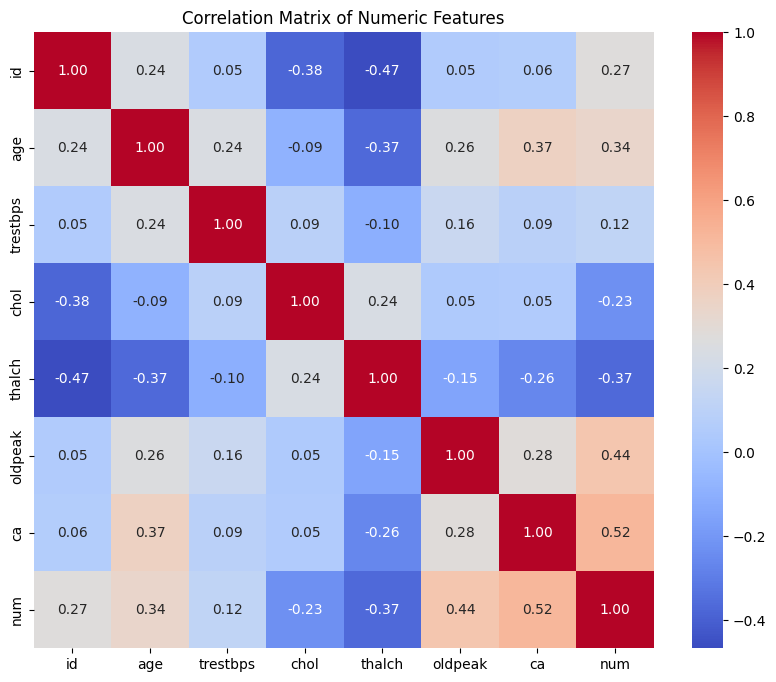

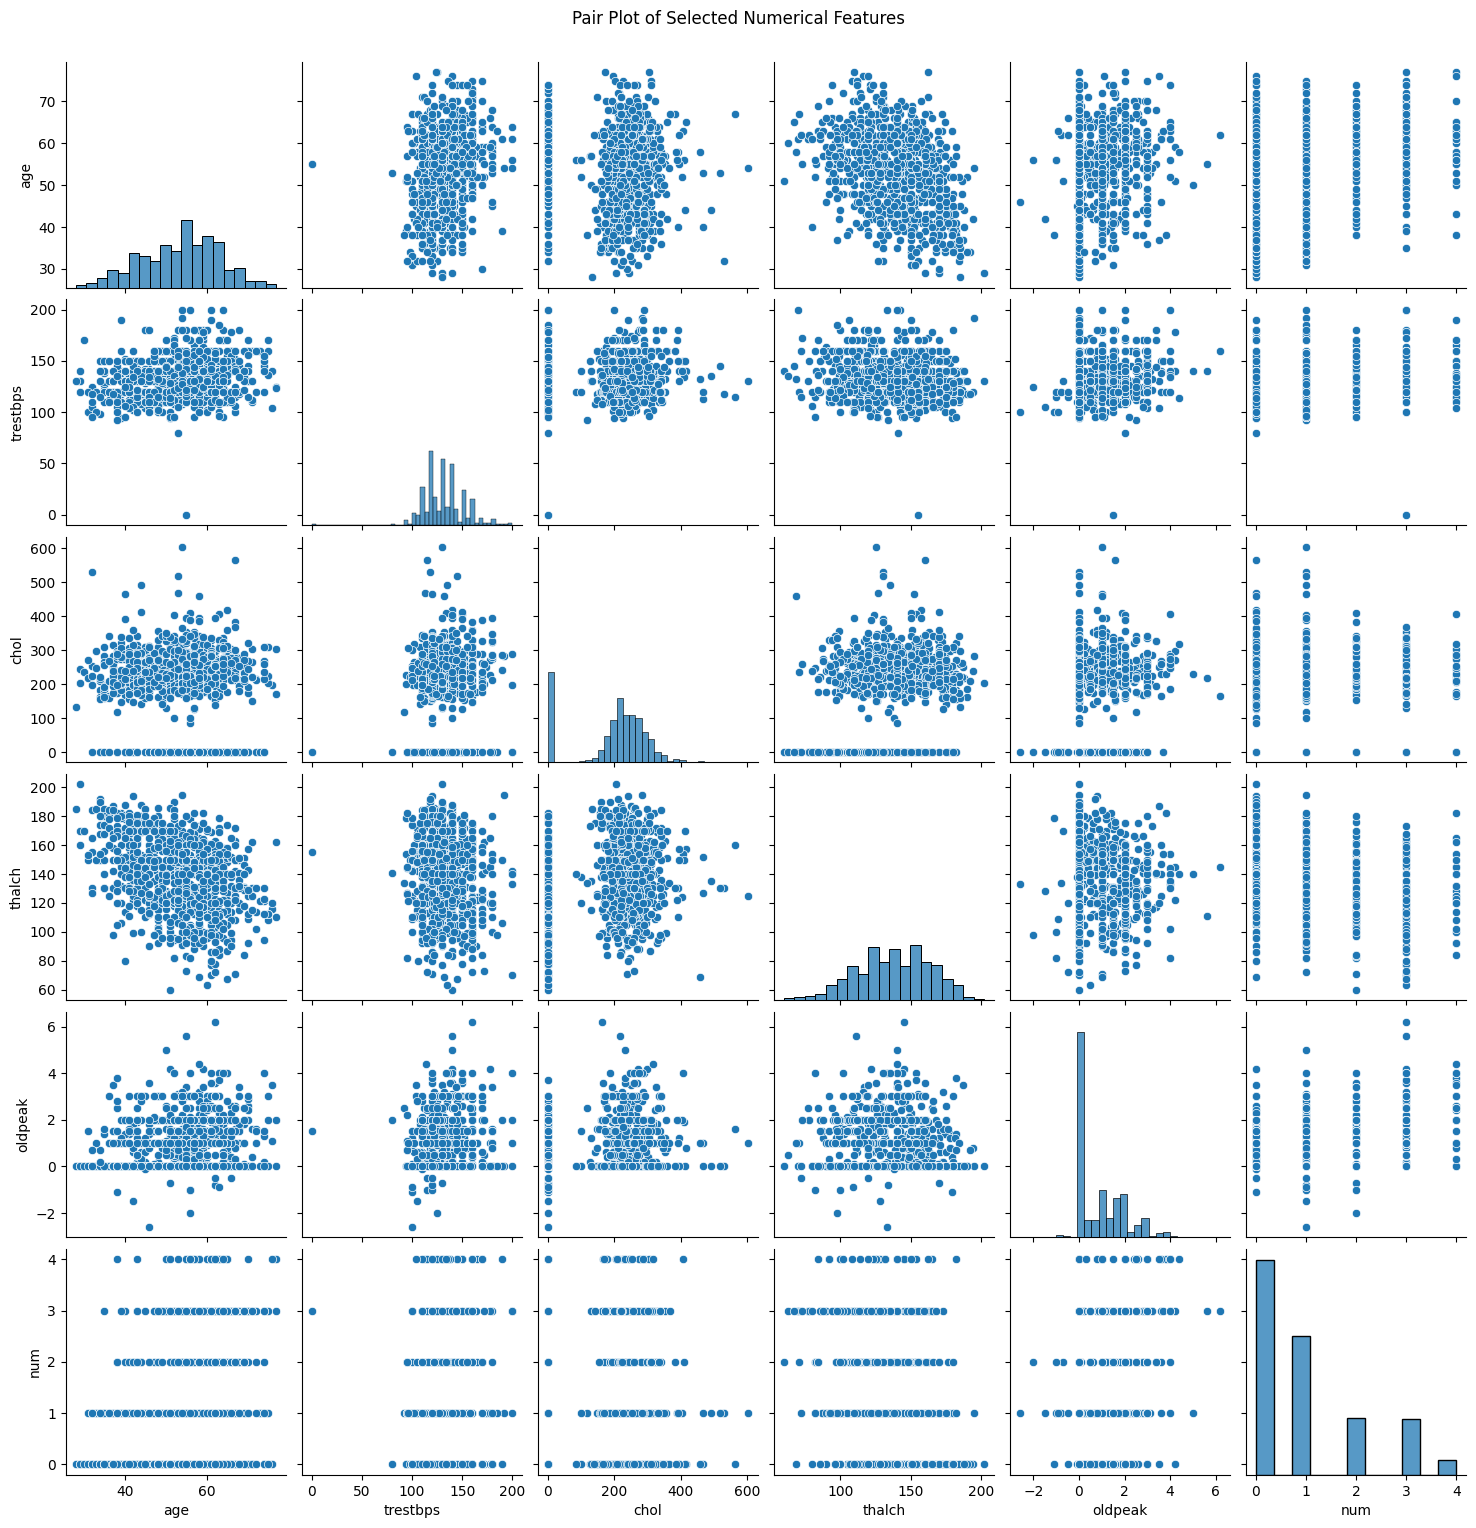

In [ ]:
# Correlation among numeric variables
plt.figure(figsize=(10, 8))
corr = cmdf.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Pair plot for a subset of numerical features
# Selecting a subset of numerical columns that are likely relevant based on domain knowledge
subset_numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
sns.pairplot(cmdf[subset_numerical_cols])
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
plt.show()

Mean:  53.51086956521739
Mode:  54
Median:  54.0


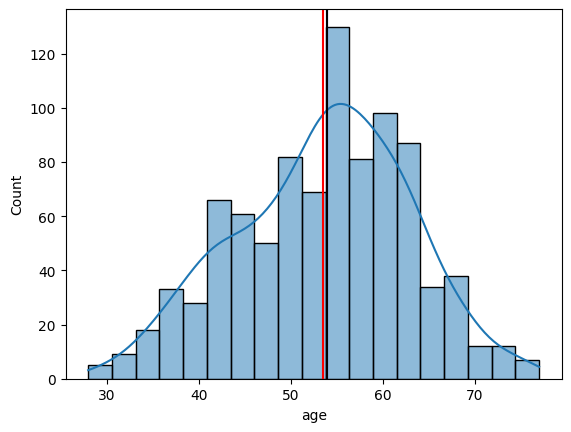

In [ ]:
# Age
Mean = cmdf['age'].mean()
Mode = cmdf['age'].mode()[0]
Median = cmdf['age'].median()
sns.histplot(cmdf['age'],kde=True)
plt.axvline(cmdf['age'].mean(),color='red')
plt.axvline(cmdf['age'].mode()[0],color='blue')
plt.axvline(cmdf['age'].median(),color='black')

print('Mean: ', Mean)
print('Mode: ', Mode)
print('Median: ', Median)

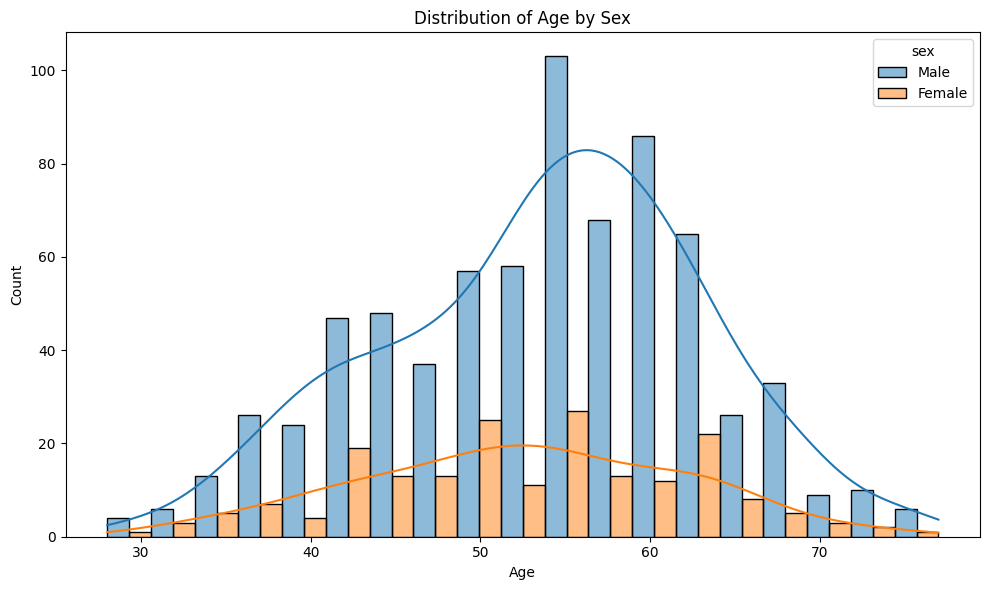

In [ ]:
#Age vs. Gender
import matplotlib.pyplot as plt
import seaborn as sns

# Create the histogram using seaborn
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.histplot(data=cmdf, x='age', hue='sex', kde=True, multiple='dodge')

plt.title('Distribution of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Insight:
1. 22 Females are in the range of 54 - 55
2. 70 Males are in the range of 54 - 55

=>  Males are more likely to have heart disease than females.



Analyzing feature: trestbps
Mean: 132.13
Mode: 120.0
Median: 130.00


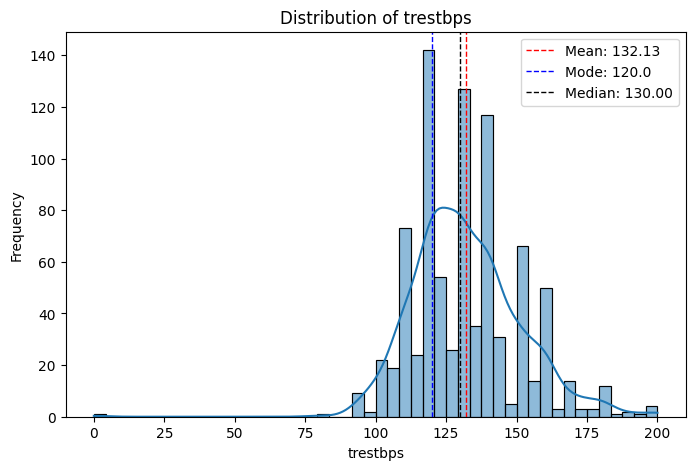


Analyzing feature: chol
Mean: 199.13
Mode: 0.0
Median: 223.00


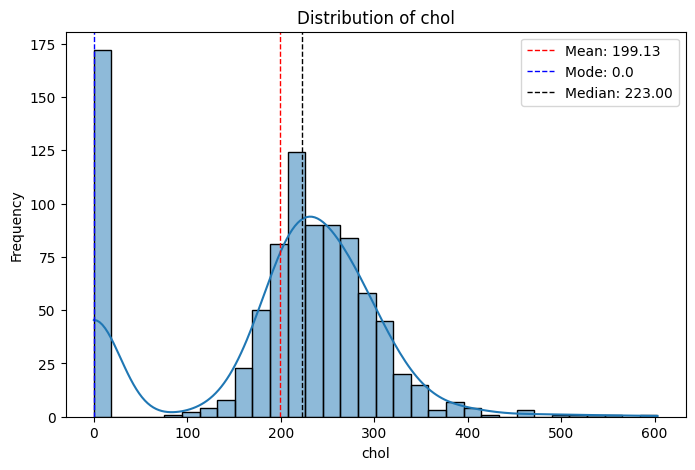


Analyzing feature: thalch
Mean: 137.55
Mode: 150.0
Median: 140.00


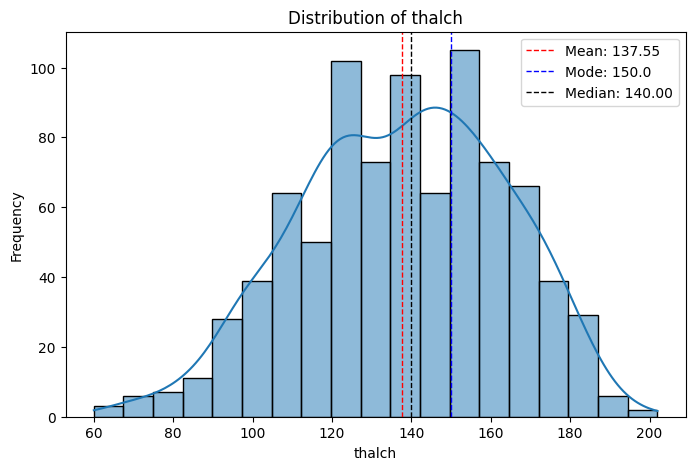


Analyzing feature: oldpeak
Mean: 0.88
Mode: 0.0
Median: 0.50


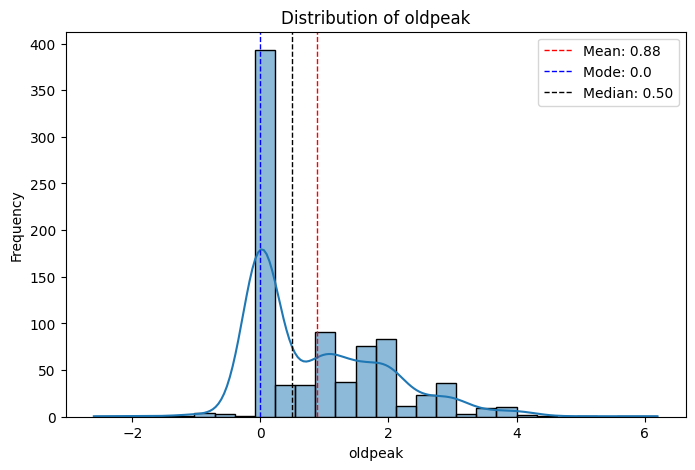


Analyzing feature: ca
Mean: 0.68
Mode: 0.0
Median: 0.00


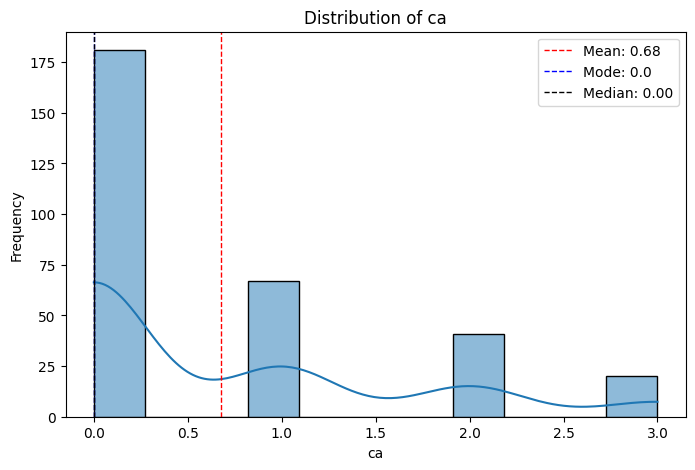


Analyzing feature: num
Mean: 1.00
Mode: 0
Median: 1.00


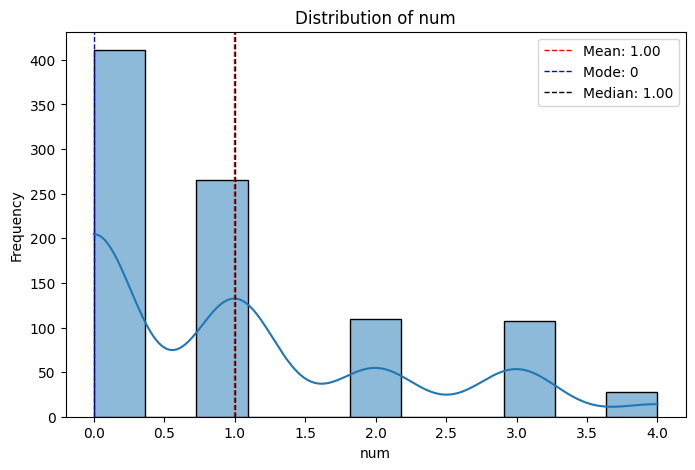

In [ ]:
numeric_features = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

for feature in numeric_features:
    print(f"\nAnalyzing feature: {feature}")
    Mean = cmdf[feature].mean()
    Mode = cmdf[feature].mode()[0] if not cmdf[feature].mode().empty else 'N/A'
    Median = cmdf[feature].median()

    print(f'Mean: {Mean:.2f}')
    print(f'Mode: {Mode}')
    print(f'Median: {Median:.2f}')

    plt.figure(figsize=(8, 5))
    sns.histplot(cmdf[feature], kde=True)
    plt.axvline(Mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {Mean:.2f}')
    if Mode != 'N/A':
        plt.axvline(Mode, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {Mode}')
    plt.axvline(Median, color='black', linestyle='dashed', linewidth=1, label=f'Median: {Median:.2f}')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Insight:

1. Missing Values: Several features (trestbps, chol, thalch,
oldpeak, ca, and thal) have missing values, as indicated by the Non-Null Count in the cmdf.info() output and the lower count in the .describe() output for these columns. The analysis of chol and trestbps also suggests that 0.0 might be used to represent missing data in some cases.

2. Skewness: Some features (trestbps, chol, oldpeak, and ca) are skewed, which might require transformation depending on the modeling techniques used later.

3. Anomalies: The 0.0 values in trestbps and chol, and the negative value in oldpeak should be investigated further as they could be data entry errors or represent missing values.

4. ca feature: The large number of missing values and the skewed distribution of ca will need careful handling during data preprocessing.

###Original Categorical Features

In [ ]:
# Describe categorical data
print("Categorical Data Pre-transform:")
cmdf.describe(include=['object']).T

Categorical Data Pre-transform:


,count,unique,top,freq
sex,920,2,Male,726
dataset,920,4,Cleveland,304
cp,920,4,asymptomatic,496
fbs,830,2,False,692
restecg,918,3,normal,551
exang,865,2,False,528
slope,611,3,flat,345
thal,434,3,normal,196


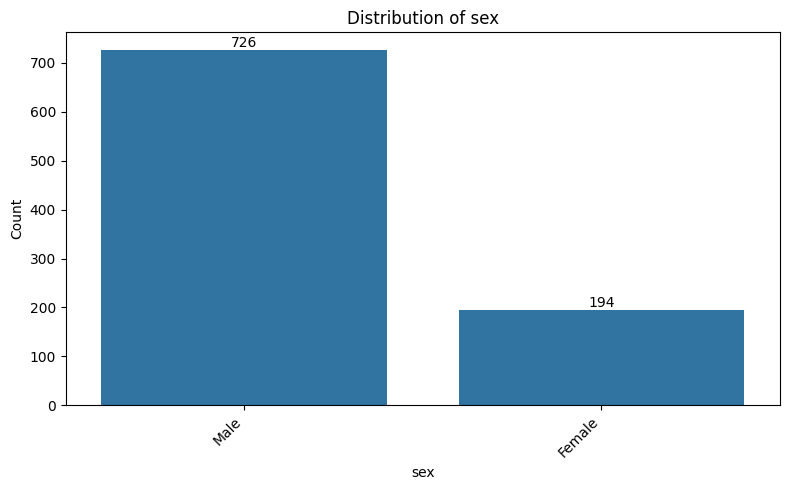

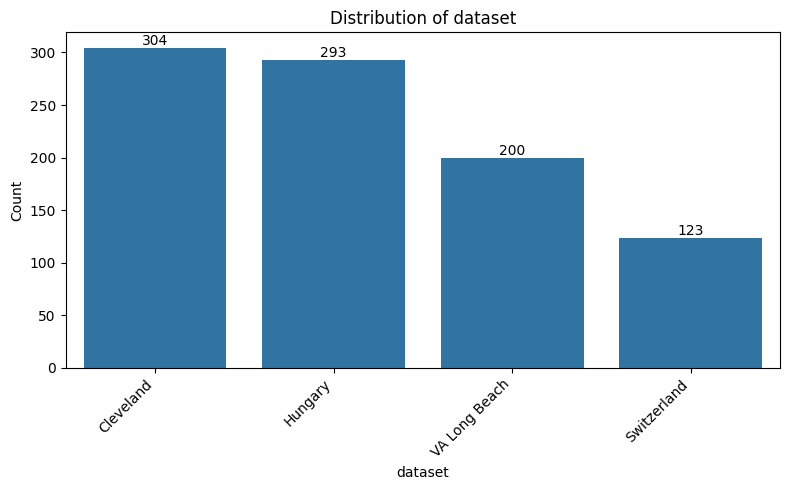

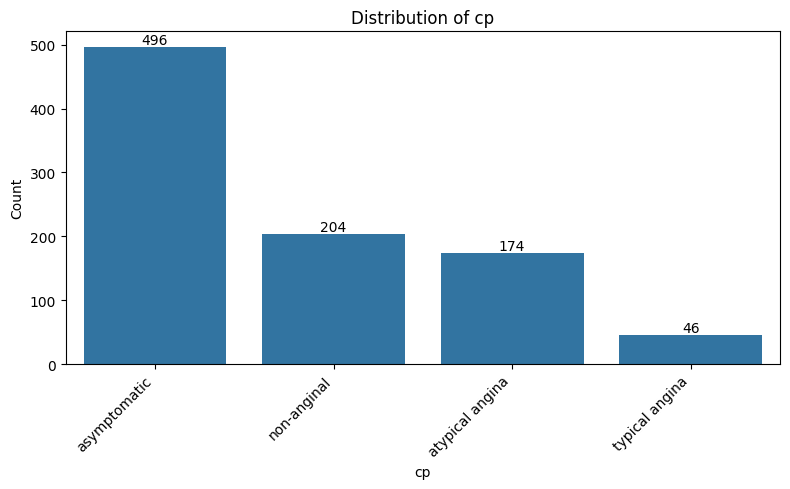

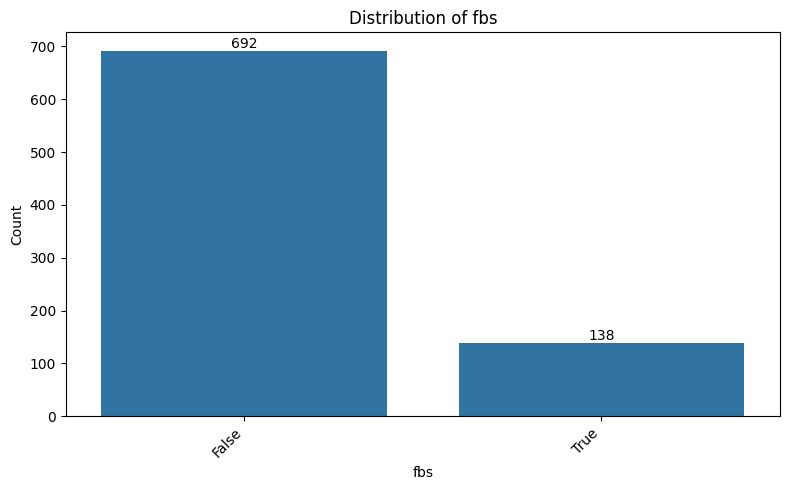

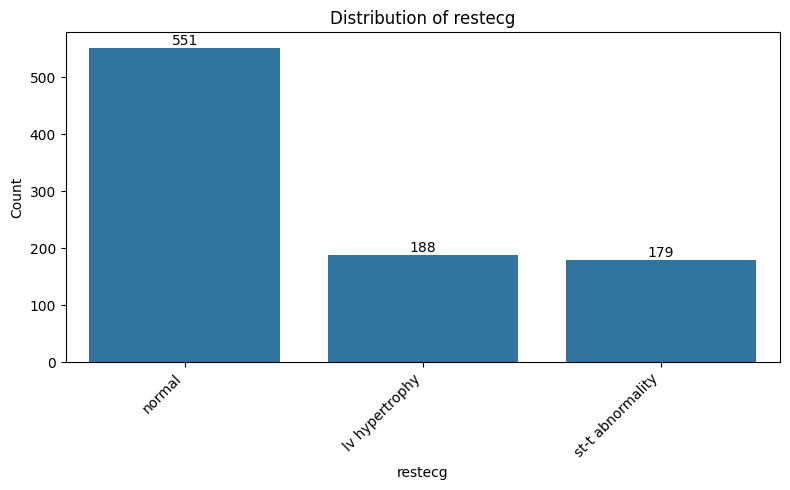

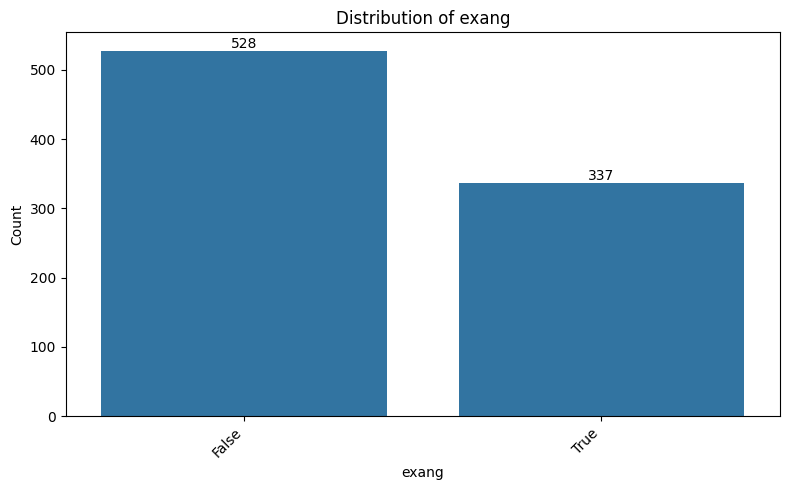

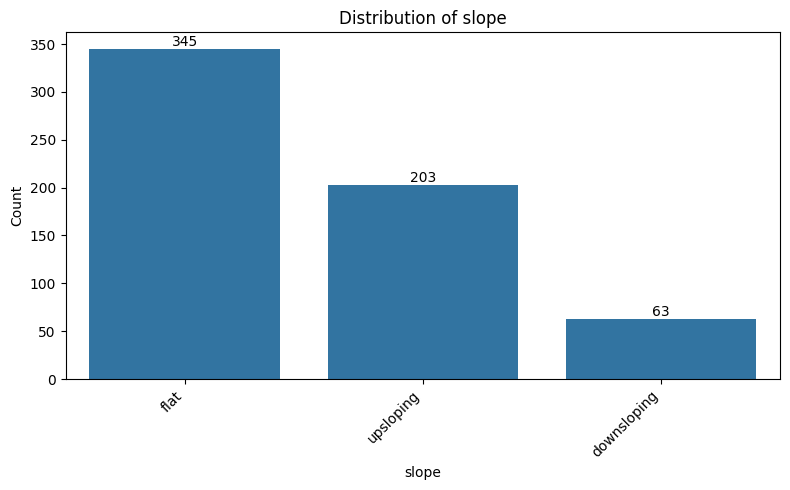

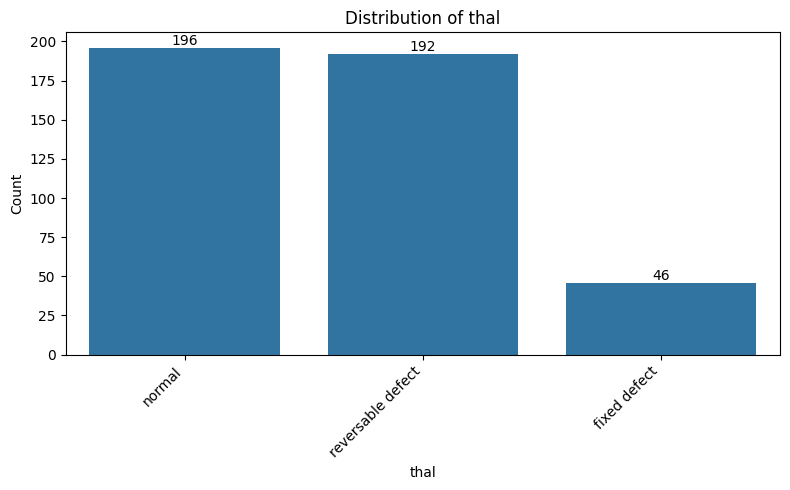

In [ ]:
categorical_features = cmdf.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=cmdf, x=feature, order=cmdf[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container)

    plt.show()

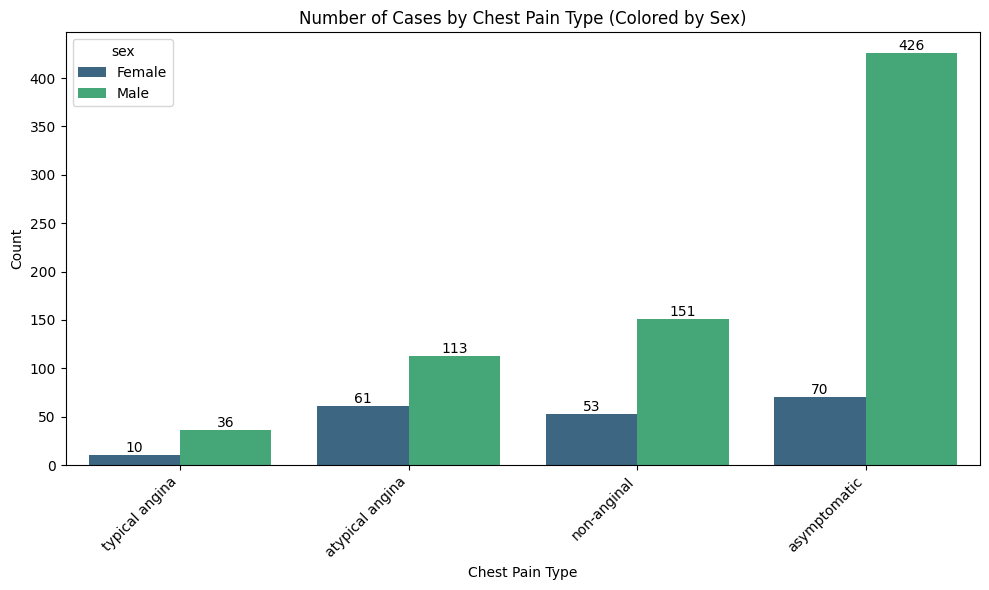

In [ ]:
# Chest Pain vs. Gender
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group data by chest pain type and sex and count occurrences
grouped_data = cmdf.groupby(['cp', 'sex']).size().reset_index(name='count')

# Define the order of chest pain types
cp_order = ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']

# Reorder the grouped data according to the desired chest pain type order
grouped_data['cp'] = pd.Categorical(grouped_data['cp'], categories=cp_order, ordered=True)
grouped_data = grouped_data.sort_values('cp')

# Create the grouped bar chart using seaborn and matplotlib
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='cp', y='count', hue='sex', palette='viridis')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Cases by Chest Pain Type (Colored by Sex)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight:

1. Male makes up 78.91% (726 records) while Female makes up 21.08% (194 records).
2. The dataset has imbalances in features like 'sex' and the origin 'dataset'.
3. There is a notable presence of individuals with 'asymptomatic' chest pain.
4. Several categorical features (fbs, restecg, exang, slope, and thal) have missing values, which will need to be addressed during data preprocessing.
5. The distributions within categories provide valuable context about the characteristics of the individuals in the dataset.


###Original Data Distribution

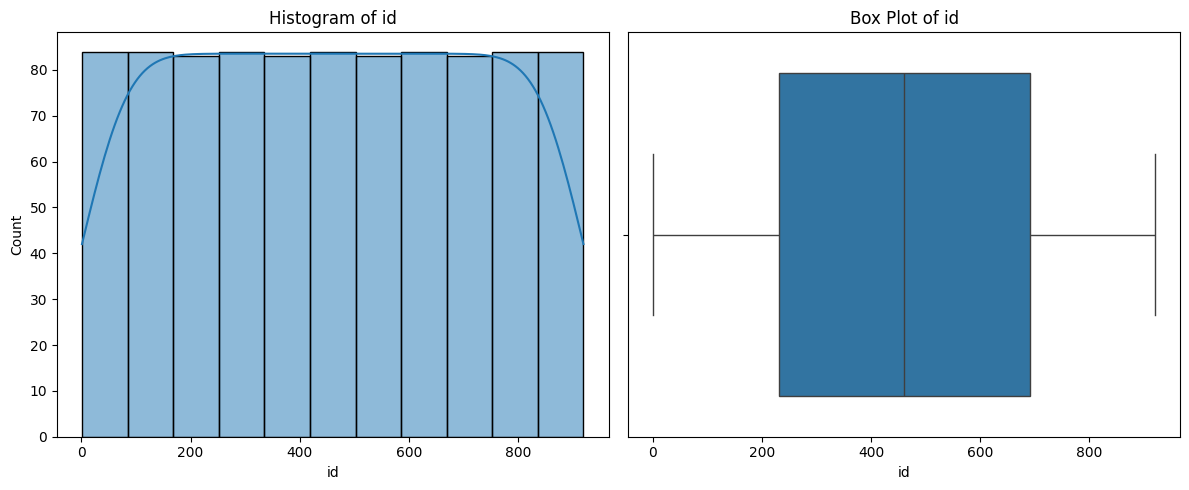

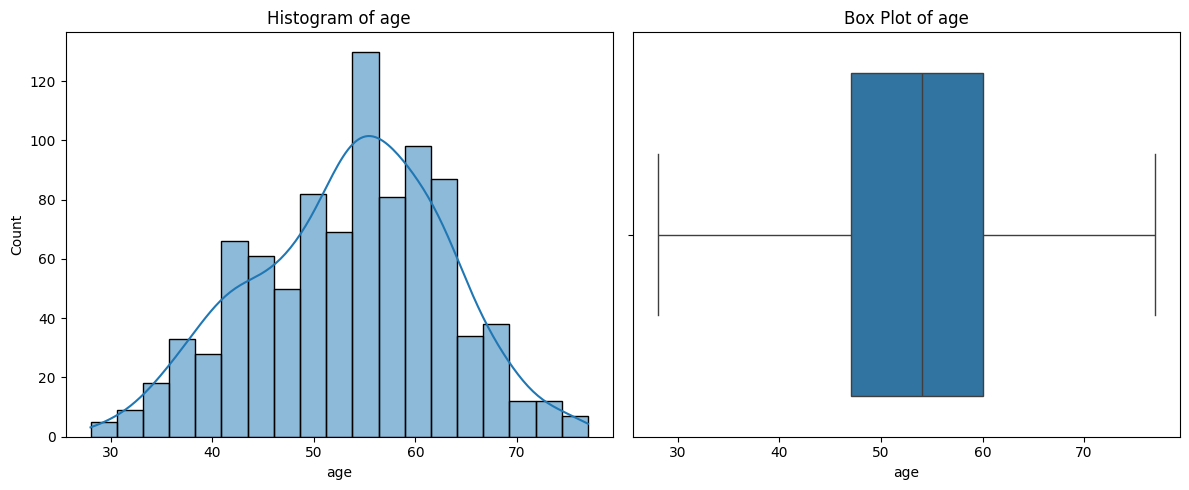

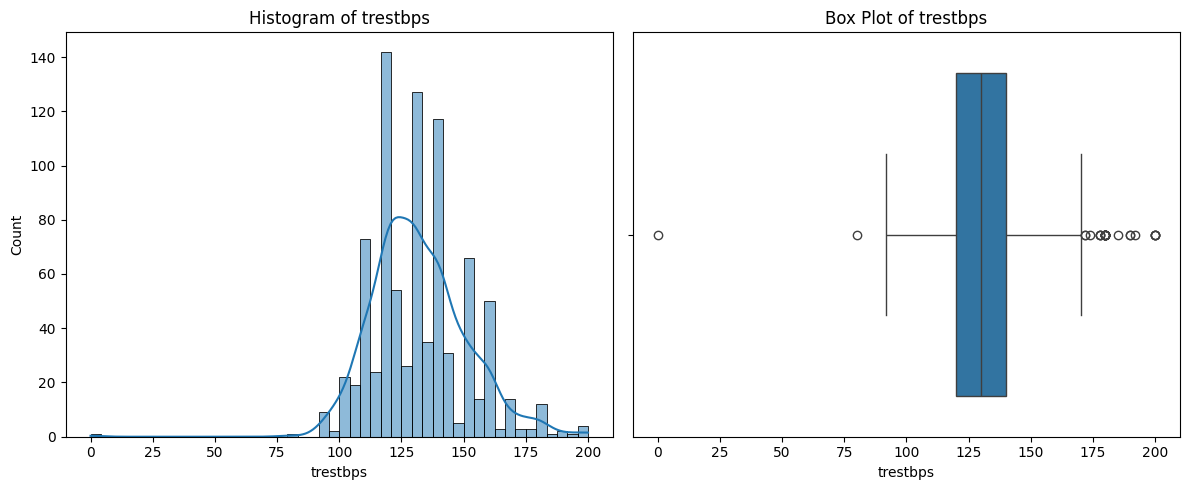

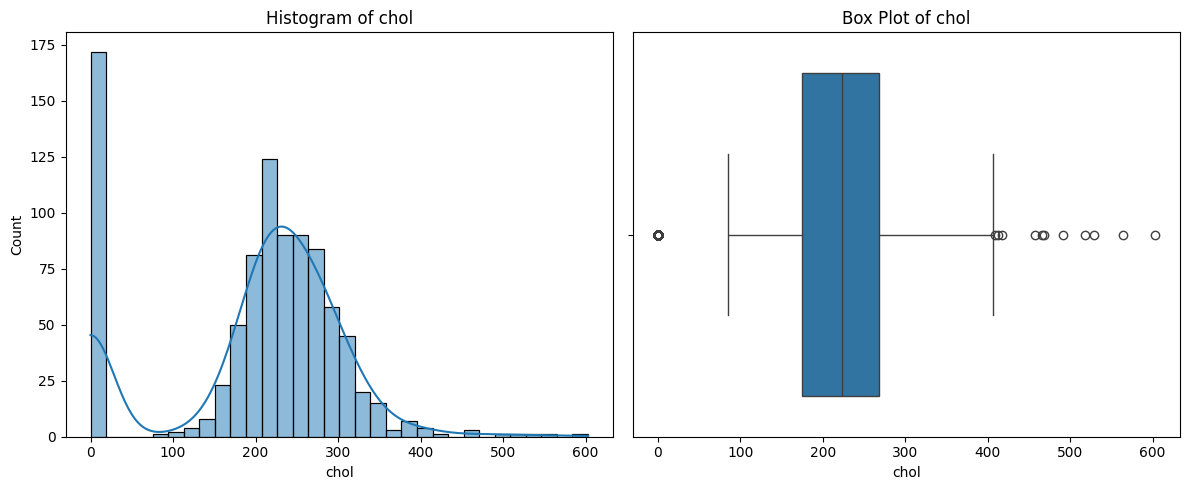

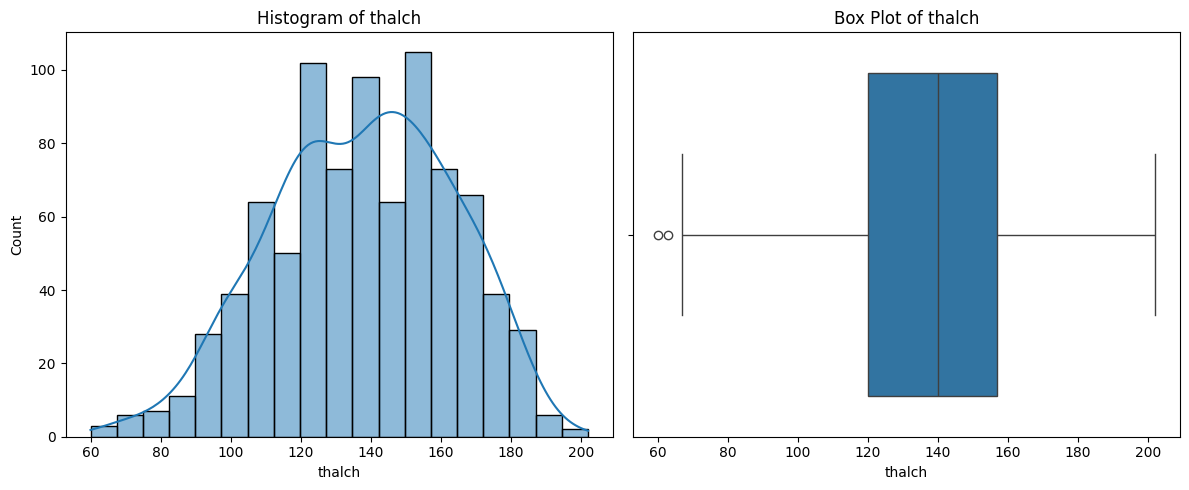

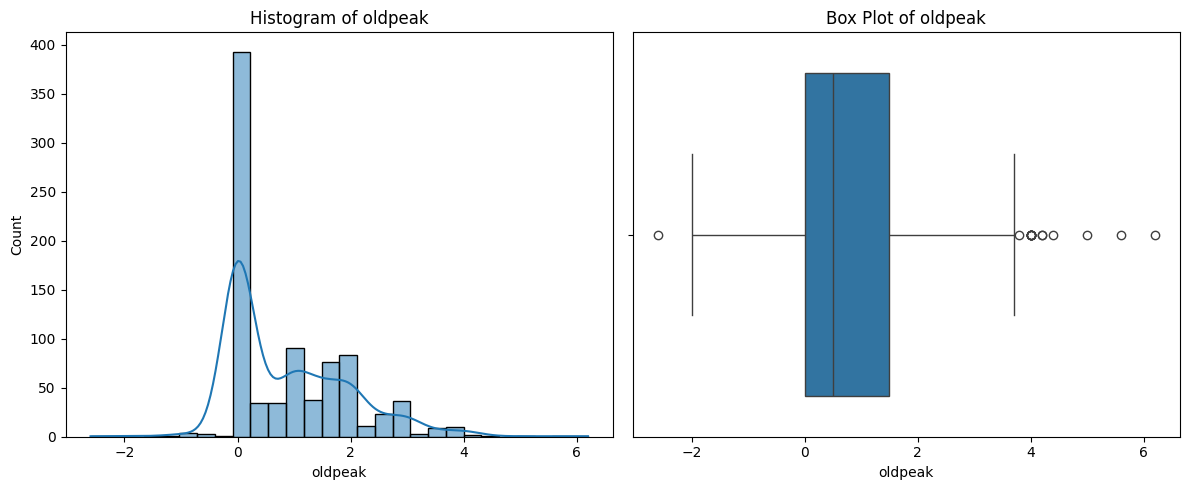

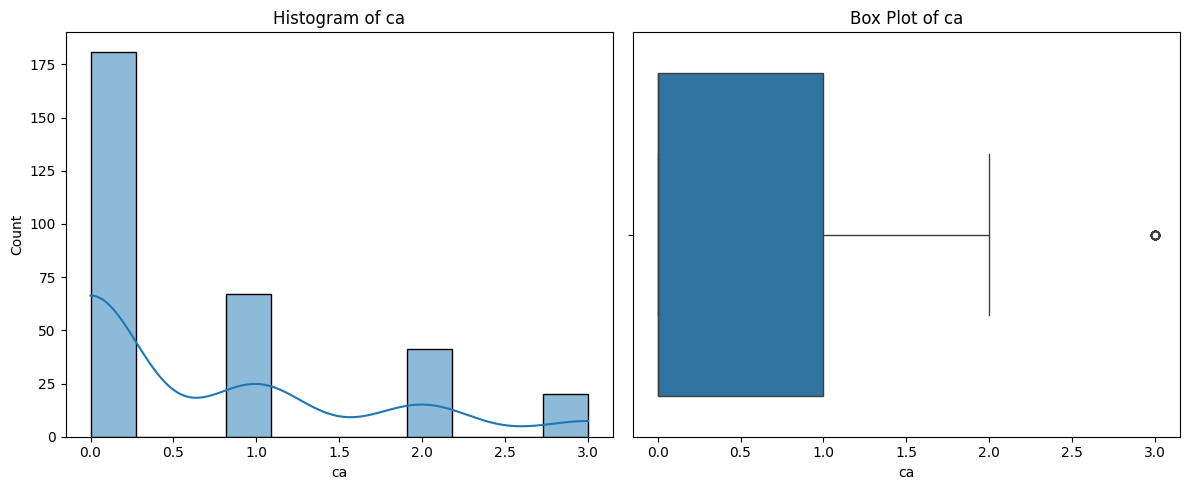

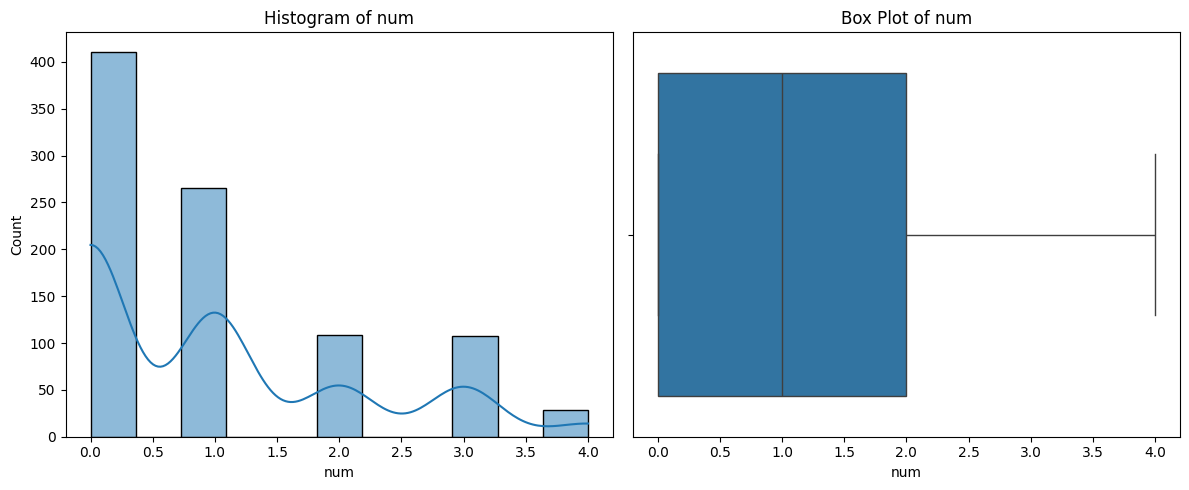

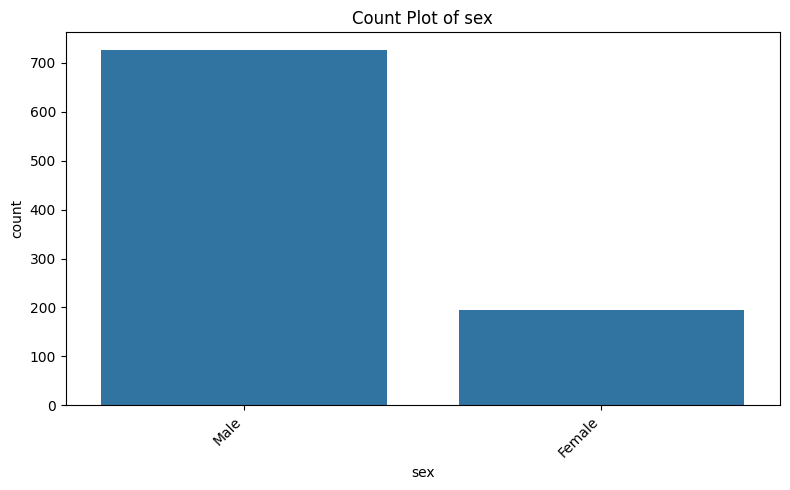

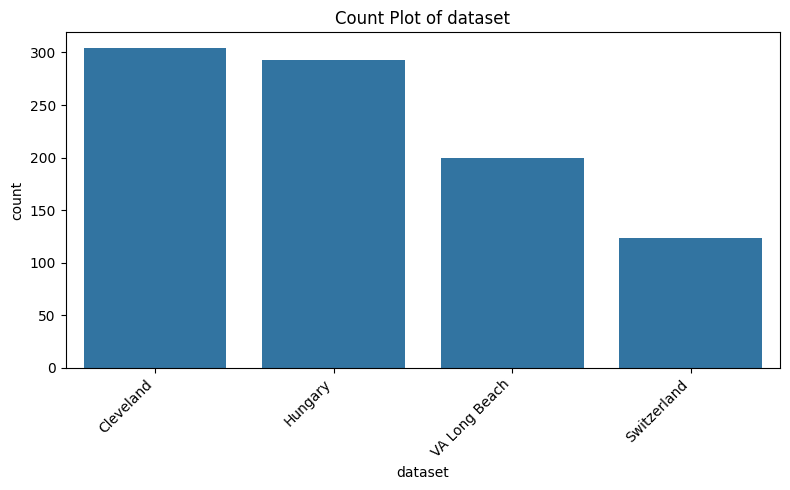

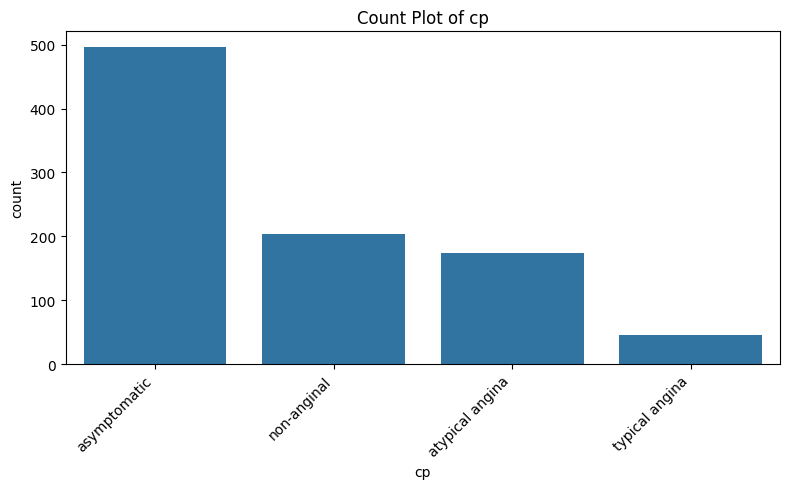

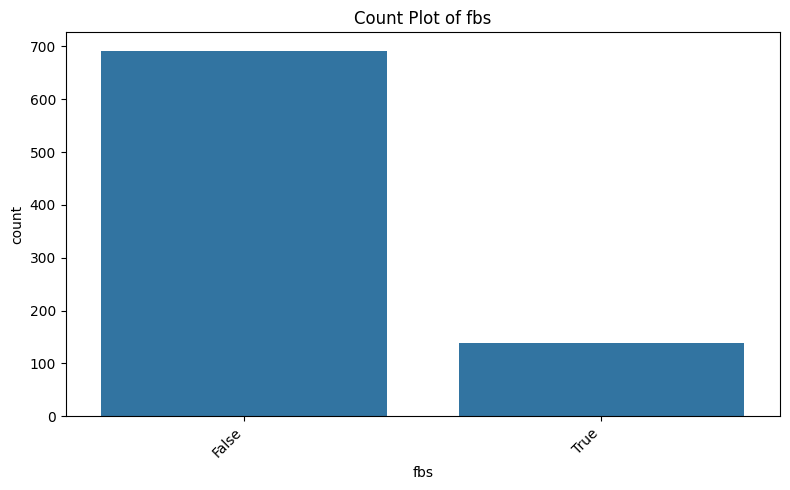

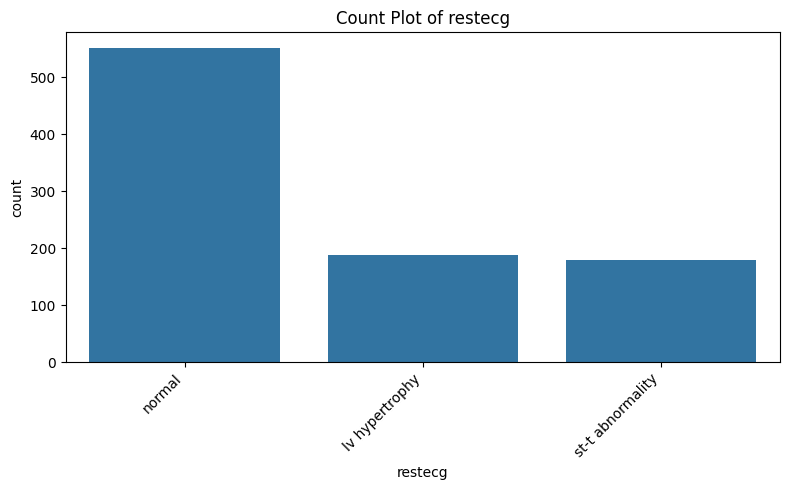

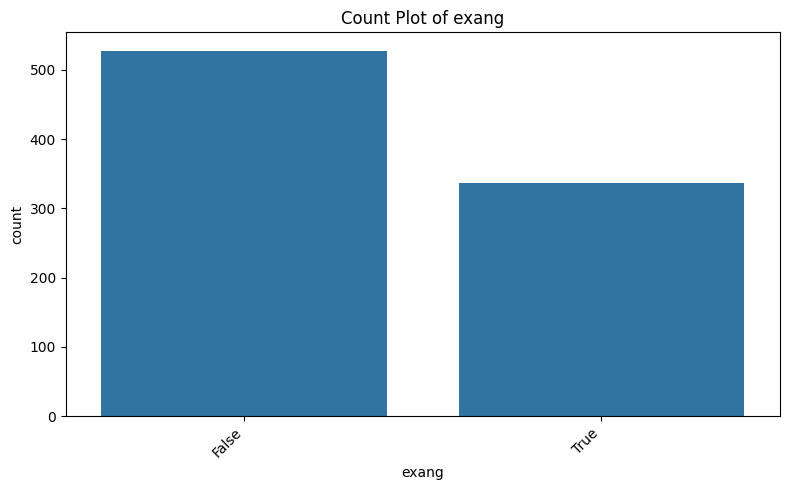

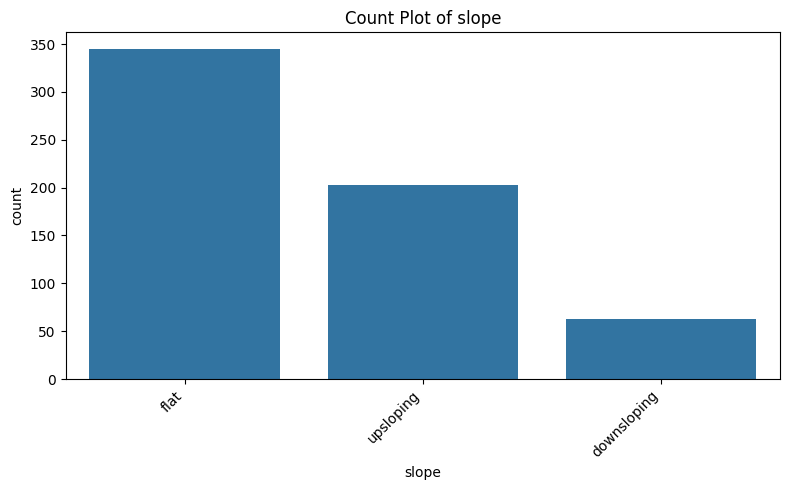

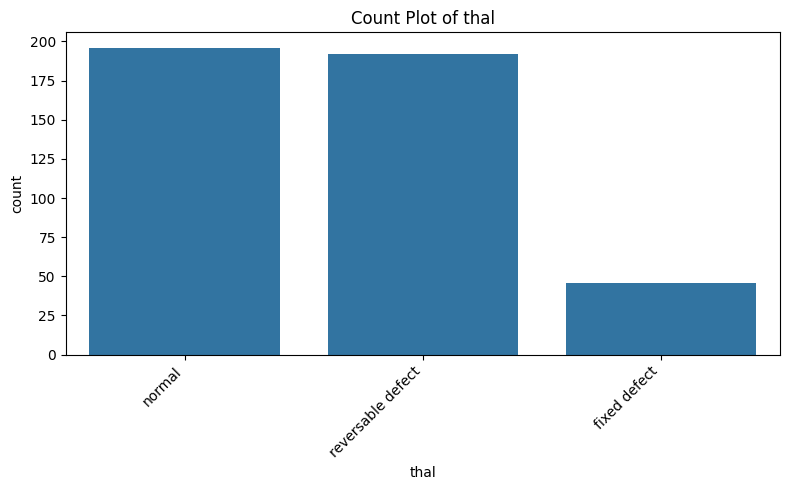

In [ ]:
numerical_cols = cmdf.select_dtypes(include=np.number).columns
categorical_cols = cmdf.select_dtypes(include='object').columns

# Histograms and Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=cmdf, x=col, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=cmdf, x=col)
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=cmdf, x=col, order=cmdf[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

###Missing Values

Missing Values Information:
          Missing Count  Missing Percentage
trestbps             59            6.413043
chol                 30            3.260870
fbs                  90            9.782609
restecg               2            0.217391
thalch               55            5.978261
exang                55            5.978261
oldpeak              62            6.739130
slope               309           33.586957
ca                  611           66.413043
thal                486           52.826087


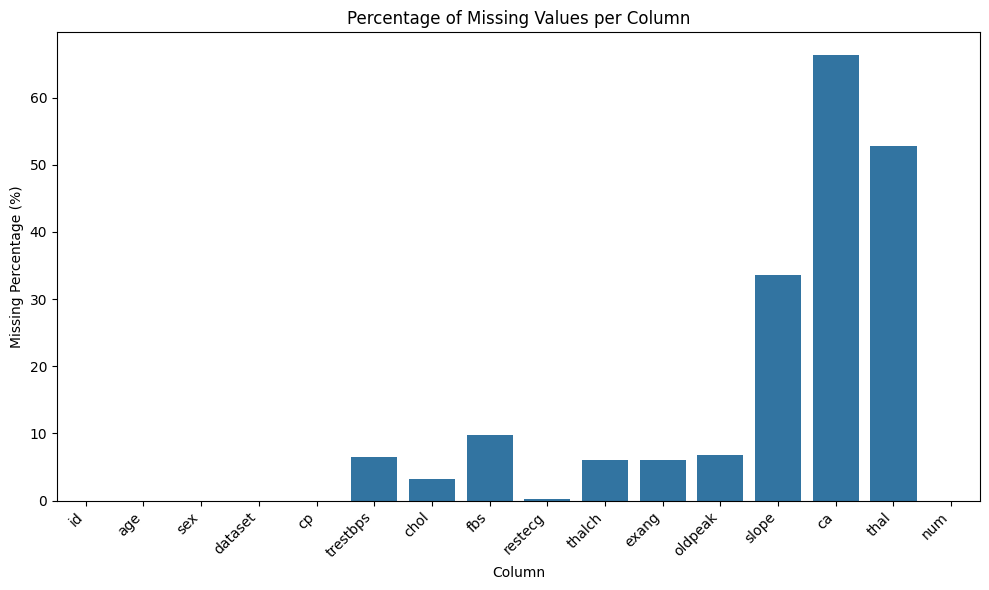

In [ ]:
missing_values = cmdf.isnull().sum()
missing_percentage = (missing_values / len(cmdf)) * 100

missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print("Missing Values Information:")
print(missing_info[missing_info['Missing Count'] > 0])

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_info.index, y=missing_info['Missing Percentage'])
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

##PHASE 2. DATA PREPARATION & FEATURE ENGINEERING

###Clean Missing Values

In [ ]:
# 2. Remove columns with high missing values (Already done in the plan, but should be applied to cmdf after filtering)
columns_to_drop = ['ca', 'thal', 'slope']
# We will drop these columns from cmdf after the filtering steps

# 3. and 4. Impute numerical columns with median
numerical_cols_to_impute = ['chol', 'trestbps', 'thalch', 'oldpeak']
for col in numerical_cols_to_impute:
    # Impute directly on cmdf after filtering
    median_value = cmdf[col].median()
    cmdf[col].fillna(median_value, inplace=True)

# 5. Impute categorical columns with mode
categorical_cols_to_impute = ['fbs', 'restecg', 'exang']
for col in categorical_cols_to_impute:
    # Impute directly on cmdf after filtering
    mode_value = cmdf[col].mode()[0]
    cmdf[col].fillna(mode_value, inplace=True)

# Now drop the columns with high missing values from cmdf
cmdf = cmdf.drop(columns=columns_to_drop)


# 6. Verify that there are no remaining missing values
missing_values_after_cleaning = cmdf.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after_cleaning[missing_values_after_cleaning > 0])

display(cmdf.head())

Missing values after cleaning:
Series([], dtype: int64)


/tmp/ipython-input-13-1167192787.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cmdf[col].fillna(median_value, inplace=True)
/tmp/ipython-input-13-1167192787.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


Insight:
*   Several features in the dataset contained missing values, with `ca`, `thal`, and `slope` having the highest percentages at 66.41%, 52.83%, and 33.59% respectively.
*   Other features like `fbs`, `oldpeak`, `trestbps`, `thalch`, and `exang` also had a notable percentage of missing data, ranging from approximately 6% to 9.8%.
*   After handling missing values by dropping columns with high missing percentages and imputing the rest using the median for numerical features and the mode for categorical features, the resulting DataFrame had no remaining missing values.
*   The features `ca`, `thal`, and `slope` had a significant amount of missing data, which led to their removal from the dataset. This suggests that these features may not be reliable for analysis or modeling due to the high proportion of missing information.


### Clean Outliers Values

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] # Removed 'ca'

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(cmdf[columns_to_check]))

# Define a Z-score threshold for outlier detection (you can adjust this threshold)
z_score_threshold = 2.8

# Identify outliers using the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the rows containing outliers
print("Rows with outliers:")
print(cmdf[outliers])

# Remove outliers
cmdf = cmdf[~outliers]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(cmdf.head(5))

Rows with outliers:
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
91    92   62  Female      Cleveland     asymptomatic     160.0  164.0  False   
121  122   63  Female      Cleveland     asymptomatic     150.0  407.0  False   
123  124   55    Male      Cleveland     asymptomatic     140.0  217.0  False   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
152  153   67  Female      Cleveland      non-anginal     115.0  564.0  False   
183  184   59    Male      Cleveland   typical angina     178.0  270.0  False   
188  189   54    Male      Cleveland  atypical angina     192.0  283.0  False   
191  192   51    Male      Cleveland     asymptomatic     140.0  298.0  False   
285  286   58    Male      Cleveland     asymptomatic     114.0  318.0  False   
293  294   63    Male      Cleveland     asymptomatic     140.0  187.0  False   
338  339   39    Male        Hungary  atypical angina     190.0  241.0  False   
528  529

<Axes: xlabel='trestbps', ylabel='Count'>

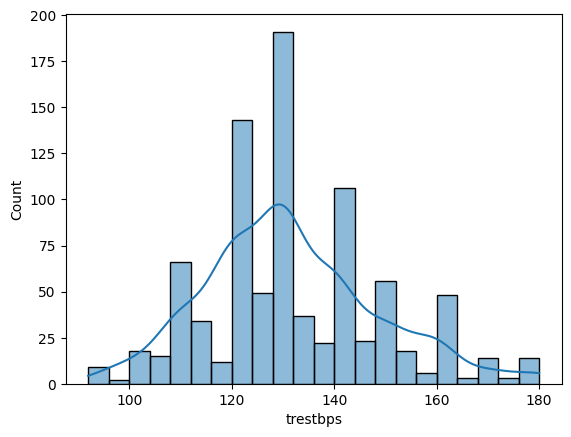

In [ ]:
# Drop blood pressure at [0,80)
cmdf = cmdf[cmdf['trestbps'] != 0]
sns.histplot(cmdf['trestbps'], kde=True)

### Post-transform EDA

In [ ]:
#Check general info Post-transform
cmdf.info()
cmdf.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        889 non-null    int64  
 1   age       889 non-null    int64  
 2   sex       889 non-null    object 
 3   dataset   889 non-null    object 
 4   cp        889 non-null    object 
 5   trestbps  889 non-null    float64
 6   chol      889 non-null    float64
 7   fbs       889 non-null    bool   
 8   restecg   889 non-null    object 
 9   thalch    889 non-null    float64
 10  exang     889 non-null    bool   
 11  oldpeak   889 non-null    float64
 12  num       889 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 85.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
440,441,53,Male,Hungary,asymptomatic,124.0,260.0,False,st-t abnormality,112.0,True,3.0,0
30,31,69,Female,Cleveland,typical angina,140.0,239.0,False,normal,151.0,False,1.8,0
414,415,50,Male,Hungary,atypical angina,120.0,168.0,False,normal,160.0,False,0.0,0
80,81,45,Male,Cleveland,asymptomatic,104.0,208.0,False,lv hypertrophy,148.0,True,3.0,0
598,599,34,Male,Switzerland,asymptomatic,115.0,0.0,False,normal,154.0,False,0.2,1
87,88,53,Female,Cleveland,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,0
594,595,56,Male,Hungary,asymptomatic,155.0,342.0,True,normal,150.0,True,3.0,1
752,753,63,Male,VA Long Beach,asymptomatic,160.0,230.0,True,normal,105.0,True,1.0,3
194,195,68,Female,Cleveland,non-anginal,120.0,211.0,False,lv hypertrophy,115.0,False,1.5,0
600,601,36,Male,Switzerland,asymptomatic,110.0,0.0,False,normal,125.0,True,1.0,1


In [ ]:
# Describe mumeric features Post-transform
print("Numeric Data Post-transform:")
cmdf.describe(include=['int','float']).T

Numeric Data Post-transform:


,count,mean,std,min,25%,50%,75%,max
id,889.0,458.781777,265.861661,1.0,231.0,456.0,689.0,920.0
age,889.0,53.391451,9.441604,28.0,47.0,54.0,60.0,77.0
trestbps,889.0,131.506187,16.909144,92.0,120.0,130.0,140.0,180.0
chol,889.0,199.106862,105.821544,0.0,179.0,223.0,265.0,491.0
thalch,889.0,138.120360,24.812589,69.0,120.0,140.0,156.0,202.0
oldpeak,889.0,0.803037,0.962004,-2.0,0.0,0.5,1.5,3.8
num,889.0,0.956130,1.114649,0.0,0.0,1.0,2.0,4.0


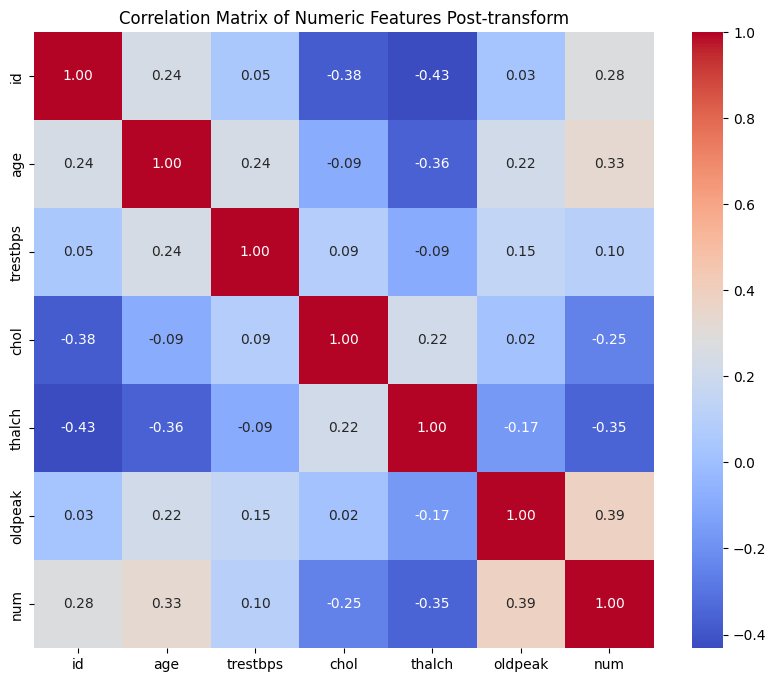

In [ ]:
# Correlation among numeric features Post-transform
plt.figure(figsize=(10, 8))
corr = cmdf.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features Post-transform")
plt.show()

In [ ]:
# Describe categorical features Post-transform
print("Categorical Data Post-transform:")
cmdf.describe(include=['object']).T

Categorical Data Post-transform:


,count,unique,top,freq
sex,889,2,Male,700
dataset,889,4,Cleveland,294
cp,889,4,asymptomatic,472
restecg,889,3,normal,538


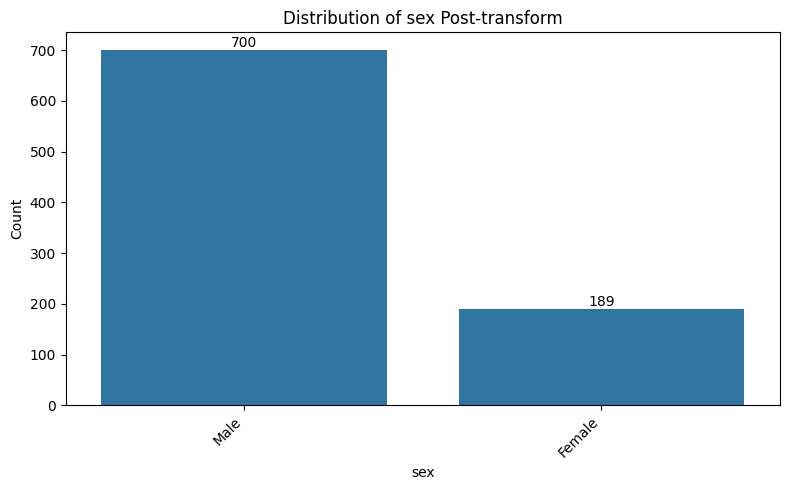

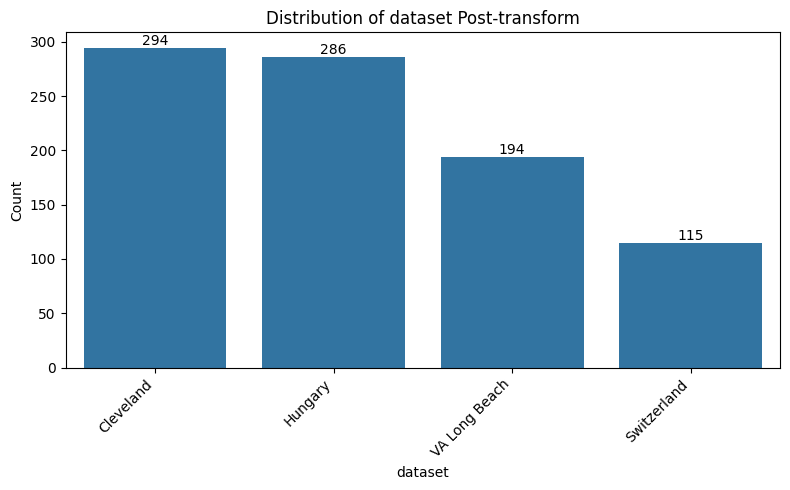

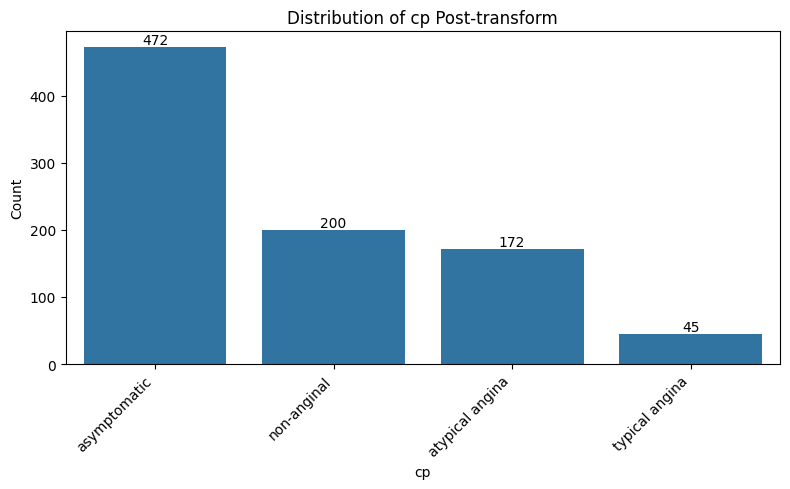

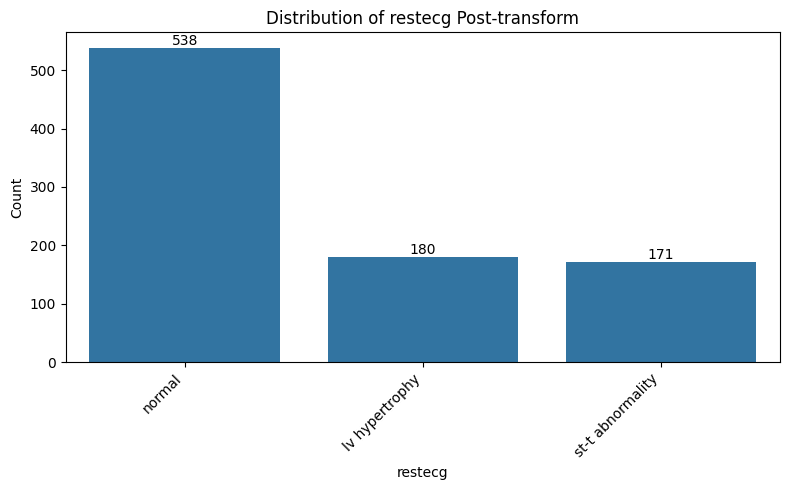

In [ ]:
# Distribution of categorical features Post-transform
categorical_features = cmdf.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=cmdf, x=feature, order=cmdf[feature].value_counts().index)
    plt.title(f'Distribution of {feature} Post-transform')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container)

    plt.show()

### Split Data: Train vs. Test

In [ ]:
# Rename those attributes to handle problems in the future.
# These replacements should be done on the cleaned cmdf dataframe
cmdf['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
cmdf['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
# Use the cleaned cmdf dataframe directly
cmdf_processed = cmdf[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak']].copy() # Exclude dropped columns and 'id', 'num'

# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
cmdf_processed['target'] = ((cmdf['num'] > 0)*1).copy()

# Encoding Sex
cmdf_processed['sex'] = (cmdf_processed['sex'] == 'Male')*1

# Encoding Fbs and exang - These are already boolean/numeric after imputation, no need to re-encode as *1

# Renaming Columns Names.
cmdf_processed.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'target']

# Load Data Sample
display(cmdf_processed.head())

# Define X and y using the processed dataframe
X = cmdf_processed.drop('target',axis=1)
y = cmdf_processed['target']


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object': # Check for object type which indicates categorical features
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

/tmp/ipython-input-25-2555786358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cmdf['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
/tmp/ipython-input-25-2555786358.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,Restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,63,1,typical_angina,Cleveland,145.0,233.0,True,left_ventricular_hypertrophy,150.0,False,2.3,0
1,67,1,asymptomatic,Cleveland,160.0,286.0,False,left_ventricular_hypertrophy,108.0,True,1.5,1
2,67,1,asymptomatic,Cleveland,120.0,229.0,False,left_ventricular_hypertrophy,129.0,True,2.6,1
3,37,1,non-anginal,Cleveland,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,0,atypical_angina,Cleveland,130.0,204.0,False,left_ventricular_hypertrophy,172.0,False,1.4,0



Shape of X_train: (711, 11)
Shape of X_test: (178, 11)
Shape of y_train: (711,)
Shape of y_test: (178,)


##PHASE 3. MODEL TRAINING, ANALYSIS & EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd


# Define models
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42, probability=True)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('XGBClassifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
]

model_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted for imbalanced data
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Append metrics
    model_scores.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc})

# Create a DataFrame from the collected scores
model_scores_df = pd.DataFrame(model_scores)

# Print the tabular results
print("--- Model Evaluation Results ---")
display(model_scores_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Model Evaluation Results ---


,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,LogisticRegression,0.792135,0.791774,0.797507,0.792135,0.862108
1,SVM,0.735955,0.735997,0.736085,0.735955,0.825265
2,DecisionTreeClassifier,0.747191,0.747231,0.747318,0.747191,0.747093
3,RandomForestClassifier,0.814607,0.814566,0.814576,0.814607,0.899899
4,GaussianNB,0.814607,0.814566,0.817049,0.814607,0.880814
5,KNeighborsClassifier,0.691011,0.689171,0.692683,0.691011,0.753476
6,GradientBoostingClassifier,0.803371,0.803028,0.803961,0.803371,0.894843
7,XGBClassifier,0.769663,0.768998,0.770734,0.769663,0.887133
8,AdaBoostClassifier,0.820225,0.820270,0.820523,0.820225,0.898825


from matplotlib import pyplot as plt
model_scores_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df.plot(kind='scatter', x='Accuracy', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df.plot(kind='scatter', x='F1 Score', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df.plot(kind='scatter', x='Recall', y='ROC AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_scores_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

Insight:
1. Tree-based ensemble models (Random Forest, Gradient Boosting, XGBoost, AdaBoost) seem to be more effective for this dataset compared to simpler models like Logistic Regression, SVM, Decision Tree, and K-Nearest Neighbors.
=> This suggests that the relationships between the features and the target variable might be non-linear or involve interactions that tree-based models can capture well.

2. The Gaussian Naive Bayes model also performed surprisingly well, which could indicate that the features, despite some correlations, might still have some degree of conditional independence given the class.